# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

In [2]:
## Question 1:Is the distribution of body temperatures normal?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import math
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
temp_obs = df.temperature.sort_values()
bin_val = np.arange(start=temp_obs.min(), stop=temp_obs.max(), step=.05)
mu, std = temp_obs.mean(),temp_obs.std()
p=norm.pdf(temp_obs,mu,std)

Text(0.5,1,'Distribution of Temperature \nMean:98.249 *** Std. Dev:0.7331 *** Mode:98.0')

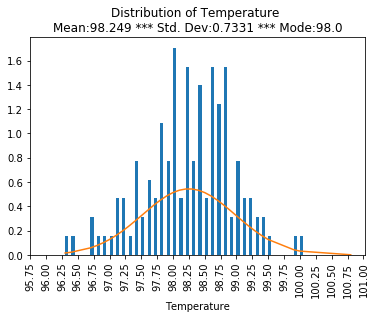

In [6]:

plt.hist(temp_obs,bins=bin_val,normed=True,stacked=True)
plt.plot(temp_obs, p)
plt.xlabel('Temperature')
#xticks = np.arange(96.0,101.0,0.1)
xticks = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.title(('Distribution of Temperature \nMean:'+('{:3.6}'.format(str(mu)))+
           ' *** Std. Dev:'+('{:1.6}'.format(str(std)))+
          ' *** Mode:'+('{:3.6}'.format(str(temp_obs.mode().values[0])))))

In [7]:
## Answer 1:Looking at this graph, the distribution seems to be normal and fairly well distributed.

In [8]:
## Question 2:Is the sample size large? Are the observations independent?
len(df)

130

In [9]:
## Answer 2: The sample size of this data is 130 which is more than the generally accepted sample size of 30 so we can conclude
    ## that this dataset is large enough. Each variable in this dataset measures the temperature of a person and is independent 
    ## of each other

In [10]:
## Question 3:Is the true population mean really 98.6 degrees F?
## Question 4:Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [11]:
mean=df.temperature.mean()
std=df.temperature.std()
median=df.temperature.median()
sample_size=df.temperature.size

signal=mean-98.6
noise=std/(sample_size**0.5)
z_val=signal/noise
z_val

-5.454823292364079

In [12]:
##Answer: The original hypothesis is that the average is 98.6 degrees but the true population mean is not 98.6 degrees
     ## for this problem, it is better to use a one-sided test using z-score because of the size of this dataset

In [13]:
P_value=stats.norm.cdf(z_val) * 2 
P_value

4.90215701411338e-08

In [14]:
## P value is less than .05

In [15]:
t_score=stats.t.ppf(1-0.025, 129)
t_score

1.978524491458605

In [16]:
z_score=stats.norm.ppf(0.975)
z_score

1.959963984540054

In [17]:
##At what temperature should we consider someone's temperature to be "abnormal"?

In [18]:
abn_rng = 1.96 * std/ np.sqrt(130)

In [19]:
temp_rng = mean + np.array([-1, 1]) * abn_rng
temp_rng

array([98.12319411, 98.37526743])

In [20]:
## Answer: Any temperature lower than 98.1  degrees or higher than 98.38 degrees can be considered abnormal

In [21]:
##Is there a significant difference between males and females in normal temperature?

In [22]:
males=df[df.gender=='M']
males.head()
females=df[df.gender=='F']
females.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [23]:
male_mean=males.temperature.mean()
male_mean

98.1046153846154

In [24]:
male_std=males.temperature.std()
male_std

0.6987557623265908

In [25]:
female_mean=females.temperature.mean()
female_mean

98.39384615384613

In [26]:
female_std=females.temperature.std()
female_std

0.7434877527313665

In [27]:
diff_mean=female_mean - male_mean
diff_mean

0.289230769230727

In [28]:
SE=((male_std**2)/65 + (female_std**2)/65)**0.5
SE

0.12655395041982642

In [29]:
F1=female_std**2/65
M1=male_std**2/65

DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))
DF

127.5103008303909

In [30]:
t_val=((female_mean-male_mean)-0)/SE
t_val

2.285434538165274

In [31]:
p_value = stats.t.sf(np.abs(2.29), 128)*2 
p_value

0.023657711289024146

In [32]:
## there is significant difference between men and women because the p value was less than .05. I used the pvalue to see if there
## was statistical significance. 